In [20]:
import pandas as pd
import numpy as np
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter
import matplotlib.pyplot as plt
import os
from lifelines import LogNormalAFTFitter


In [4]:
path_to_save = os.getcwd()+'/HW3_MA_SA_Anna/telco.csv'
data = pd.read_csv(path_to_save ) 
data.head()

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No


In [5]:
data.columns

Index(['ID', 'region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'retire', 'gender', 'voice', 'internet', 'forward', 'custcat', 'churn'],
      dtype='object')

In [6]:
print(data.isnull().sum())


ID          0
region      0
tenure      0
age         0
marital     0
address     0
income      0
ed          0
retire      0
gender      0
voice       0
internet    0
forward     0
custcat     0
churn       0
dtype: int64


In [8]:
# categorical to dummy
data = pd.get_dummies(data, drop_first=True)
data.head()

,ID,tenure,age,address,income,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,ed_High school degree,...,ed_Some college,retire_Yes,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service,churn_Yes
0,1,13,44,9,64,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
1,2,11,33,7,136,False,True,False,False,False,...,False,False,True,True,False,True,False,False,True,True
2,3,68,52,24,116,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,4,33,33,12,33,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
4,5,23,30,9,30,True,False,False,True,False,...,False,False,True,False,False,True,False,True,False,False


In [9]:
data.columns

Index(['ID', 'tenure', 'age', 'address', 'income', 'region_Zone 2',
       'region_Zone 3', 'marital_Unmarried', 'ed_Did not complete high school',
       'ed_High school degree', 'ed_Post-undergraduate degree',
       'ed_Some college', 'retire_Yes', 'gender_Male', 'voice_Yes',
       'internet_Yes', 'forward_Yes', 'custcat_E-service',
       'custcat_Plus service', 'custcat_Total service', 'churn_Yes'],
      dtype='object')

In [10]:
data.dtypes

ID                                 int64
tenure                             int64
age                                int64
address                            int64
income                             int64
region_Zone 2                       bool
region_Zone 3                       bool
marital_Unmarried                   bool
ed_Did not complete high school     bool
ed_High school degree               bool
ed_Post-undergraduate degree        bool
ed_Some college                     bool
retire_Yes                          bool
gender_Male                         bool
voice_Yes                           bool
internet_Yes                        bool
forward_Yes                         bool
custcat_E-service                   bool
custcat_Plus service                bool
custcat_Total service               bool
churn_Yes                           bool
dtype: object

In [12]:
# Initializing AFT models

weibull_aft = WeibullAFTFitter()
log_logistic_aft = LogLogisticAFTFitter()
log_normal_aft = LogNormalAFTFitter()


In [14]:
# event occurred column 
duration_col = 'tenure'  # customer lifetime
event_col = 'churn_Yes'  # if has churned

In [15]:
weibull_aft.fit(data, duration_col=duration_col, event_col=event_col)
log_logistic_aft.fit(data, duration_col=duration_col, event_col=event_col)
log_normal_aft.fit(data, duration_col=duration_col, event_col=event_col)

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>

In [16]:
print("Weibull AFT AIC:", weibull_aft.AIC_)
print("Log-Logistic AFT AIC:", log_logistic_aft.AIC_)
print("Log-Normal AFT AIC:", log_normal_aft.AIC_)

Weibull AFT AIC: 2958.3571269466456
Log-Logistic AFT AIC: 2952.2582596356683
Log-Normal AFT AIC: 2950.3002131922785


Some other factors are important as well except of the comparisons we made

It's critical to consider factors other than statistical scores, such as the Akaike Information Criterion (AIC), while selecting a model. The model must be easy to understand for stakeholders and include relevant and actionable factors for the business.  In addition, the predictors must be practically meaningful and statistically significant in order to be used in decision-making. Even when the data changes,the model need to remain stable and function properly. Other key factors include computational efficiency, ensuring the model runs quickly,and scalability, so it continues to perform well as data grows. The model also needs to be easy to update with new data to stay relevant. For precise and practical applications, the Log-Normal Accelerated Failure Time (AFT) model is a viable option because of its low AIC and great performance across various factors.

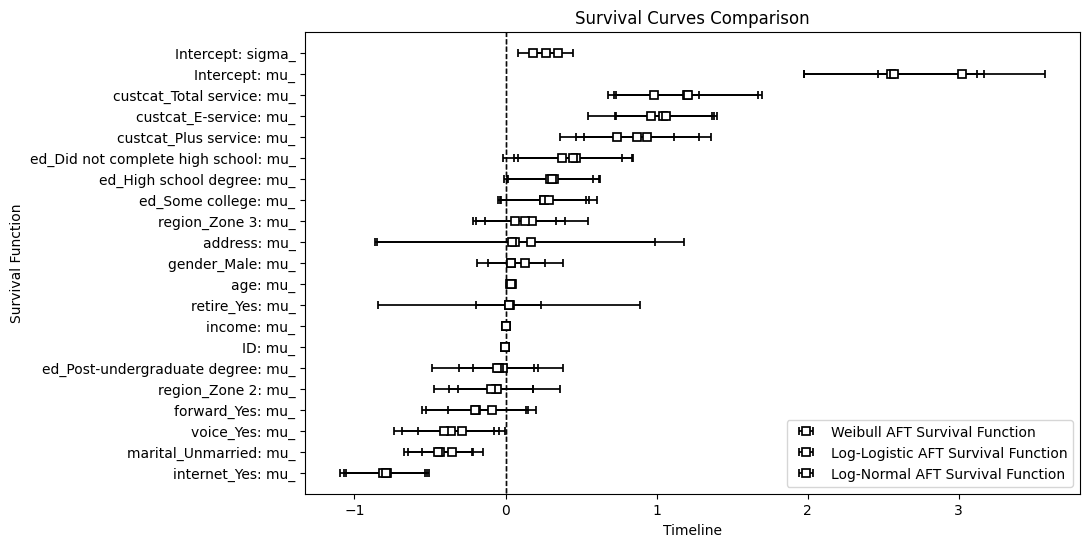

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

weibull_aft.plot(ax=ax, label='Weibull AFT Survival Function')
log_logistic_aft.plot(ax=ax, label='Log-Logistic AFT Survival Function')
log_normal_aft.plot(ax=ax, label='Log-Normal AFT Survival Function')

plt.title('Survival Curves Comparison')
plt.xlabel('Timeline')
plt.ylabel('Survival Function')
plt.legend()
plt.show()

In [19]:
# model finalization
final_model = log_normal_aft
final_model.summary

coef  exp(coef)  se(coef)  \
param  covariate                                                        
mu_    ID                              -0.000474   0.999526  0.000198   
       address                          0.042630   1.043551  0.008880   
       age                              0.033230   1.033788  0.007241   
       custcat_E-service                1.064673   2.899891  0.169648   
       custcat_Plus service             0.937889   2.554584  0.215175   
       custcat_Total service            1.210374   3.354739  0.249688   
       ed_Did not complete high school  0.376412   1.457047  0.200659   
       ed_High school degree            0.306672   1.358895  0.162321   
       ed_Post-undergraduate degree    -0.053980   0.947451  0.222322   
       ed_Some college                  0.285017   1.329785  0.164680   
       forward_Yes                     -0.203822   0.815608  0.179371   
       gender_Male                      0.035347   1.035979  0.113904   
       income                           0.001366   1.001367  0.000908   
       internet_Yes                    -0.789688   0.453986  0.143040   
       marital_Unmarried               -0.444167   0.641358  0.114912   
       region_Zone 2                   -0.094676   0.909667  0.142116   
       region_Zone 3                    0.059428   1.061229  0.140939   
       retire_Yes                       0.023372   1.023647  0.443554   
       voice_Yes                       -0.409576   0.663932  0.168434   
       Intercept                        2.571832  13.089779  0.304635   
sigma_ Intercept                        0.269709   1.309584  0.045977   

                                        coef lower 95%  coef upper 95%  \
param  covariate                                                         
mu_    ID                                    -0.000862       -0.000085   
       address                                0.025224        0.060035   
       age                                    0.019037        0.047422   
       custcat_E-service                      0.732168        1.397178   
       custcat_Plus service                   0.516153        1.359625   
       custcat_Total service                  0.720994        1.699754   
       ed_Did not complete high school       -0.016872        0.769696   
       ed_High school degree                 -0.011470        0.624815   
       ed_Post-undergraduate degree          -0.489722        0.381762   
       ed_Some college                       -0.037751        0.607785   
       forward_Yes                           -0.555382        0.147738   
       gender_Male                           -0.187902        0.258595   
       income                                -0.000414        0.003145   
       internet_Yes                          -1.070041       -0.509336   
       marital_Unmarried                     -0.669391       -0.218943   
       region_Zone 2                         -0.373219        0.183866   
       region_Zone 3                         -0.216807        0.335663   
       retire_Yes                            -0.845978        0.892721   
       voice_Yes                             -0.739701       -0.079451   
       Intercept                              1.974757        3.168906   
sigma_ Intercept                              0.179596        0.359823   

                                        exp(coef) lower 95%  \
param  covariate                                              
mu_    ID                                          0.999138   
       address                                     1.025545   
       age                                         1.019220   
       custcat_E-service                           2.079585   
       custcat_Plus service                        1.675570   
       custcat_Total service                       2.056477   
       ed_Did not complete high school             0.983270   
       ed_High school degree                       0.988595   
       ed_Post-undergraduate de

Keep significant features
Keep the final model

In [22]:
# significant features for updated columns
significant_features = [
    'tenure', 'address', 'age', 
    'custcat_E-service', 'custcat_Plus service', 'custcat_Total service',
    'voice_Yes', 'internet_Yes', 'marital_Unmarried'  # Include 'marital_Unmarried' if significant
]

features_to_use = significant_features + ['churn_Yes'] #event column

final_model = LogNormalAFTFitter()
final_model.fit(data[features_to_use], duration_col='tenure', event_col='churn_Yes')

print(final_model.summary)

                                  coef  exp(coef)  se(coef)  coef lower 95%  \
param  covariate                                                              
mu_    address                0.042824   1.043754  0.008847        0.025483   
       age                    0.036826   1.037512  0.006400        0.024283   
       custcat_E-service      1.025825   2.789395  0.169047        0.694499   
       custcat_Plus service   0.822553   2.276303  0.169425        0.490485   
       custcat_Total service  1.013269   2.754590  0.209579        0.602501   
       internet_Yes          -0.840528   0.431483  0.138259       -1.111511   
       marital_Unmarried     -0.447317   0.639341  0.114472       -0.671679   
       voice_Yes             -0.463493   0.629082  0.166771       -0.790359   
       Intercept              2.534887  12.615010  0.242611        2.059379   
sigma_ Intercept              0.283034   1.327150  0.046020        0.192836   

                              coef upper 95%  exp(c

Customer Lifetime Value (CLV)

In [32]:
# average monthly revenue (MM) 
# annual discount rate (r)

MM = 26 # assuming avg is 26
r = 0.05  

# discount factor for each month of tenure
data['Discount_Factor'] = (1 + r / 12) ** (-data['tenure'])

# CLV
data['CLV'] = data['tenure'] * MM * data['Discount_Factor']
data.drop(columns=['Discount_Factor'], inplace=True)

print(data[['ID', 'tenure', 'CLV']].head())

   ID  tenure          CLV
0   1      13   320.214718
1   2      11   273.213543
2   3      68  1332.563158
3   4      33   747.990116
4   5      23   543.460225


CLV analyze by Customer Category

In [25]:
# average CLV for each customer category

average_clv_by_eservice = data.groupby('custcat_E-service')['CLV'].mean()
average_clv_by_plus_service = data.groupby('custcat_Plus service')['CLV'].mean()
average_clv_by_total_service = data.groupby('custcat_Total service')['CLV'].mean()

In [26]:
print("Average CLV by E-service Category:")
print(average_clv_by_eservice)

print("\nAverage CLV by Plus Service Category:")
print(average_clv_by_plus_service)

print("\nAverage CLV by Total Service Category:")
print(average_clv_by_total_service)

Average CLV by E-service Category:
custcat_E-service
False    715.609466
True     908.973927
Name: CLV, dtype: float64

Average CLV by Plus Service Category:
custcat_Plus service
False    723.926554
True     843.652534
Name: CLV, dtype: float64

Average CLV by Total Service Category:
custcat_Total service
False    759.657148
True     750.811412
Name: CLV, dtype: float64


In [27]:
# 'custcat' column from dummy variables for consolidated analysis

conditions = [
    data['custcat_E-service'] == 1,
    data['custcat_Plus service'] == 1,
    data['custcat_Total service'] == 1
]

choices = ['E-service', 'Plus service', 'Total service']

data['custcat'] = np.select(conditions, choices, default='Other')

In [29]:
# average CLV by 'custcat' column

average_clv_by_custcat = data.groupby('custcat')['CLV'].mean()
print("Average CLV by Customer Category:")
print(average_clv_by_custcat)

Average CLV by Customer Category:
custcat
E-service        908.973927
Other            549.114123
Plus service     843.652534
Total service    750.811412
Name: CLV, dtype: float64


CLV analyze by Service Usage

In [31]:
average_clv_by_service = data.groupby(['voice_Yes', 'internet_Yes', 'forward_Yes'])['CLV'].mean()
print("Average CLV by Service Usage:", average_clv_by_service)

Average CLV by Service Usage: voice_Yes  internet_Yes  forward_Yes
False      False         False          765.341280
                         True           843.118643
           True          False          657.682016
                         True           641.249913
True       False         False          610.662450
                         True           856.246584
           True          False          687.224082
                         True           720.573239
Name: CLV, dtype: float64


In [33]:
# average CLV by marital status

average_clv_by_marital = data.groupby('marital_Unmarried')['CLV'].mean()
print("Average CLV by Marital Status:", average_clv_by_marital)

Average CLV by Marital Status: marital_Unmarried
False    822.833520
True     693.597944
Name: CLV, dtype: float64


In [34]:
# average CLV by retirement status

average_clv_by_retire = data.groupby('retire_Yes')['CLV'].mean()

print("Average CLV by Retirement Status:")
print(average_clv_by_retire)

Average CLV by Retirement Status:
retire_Yes
False     743.134106
True     1050.271301
Name: CLV, dtype: float64


# Report

Based on the data presented and assuming it represents the general population, our study using a Log-Normal AFT model provided significant insights into factors affecting customer churn risk. The model’s coefficients indicate how each variable influences the time until a customer departs. For instance, features with positive coefficients such as custcat_E-service, custcat_Plus service, and custcat_Total service, suggest that customers in these categories tend to stay longer with the service before exiting. Conversely, the negative coefficient for internet_Yes indicates that customers using internet services churn sooner, possibly due to competitive pressures or issues with service quality.

Segments like 'E-service', 'Plus service', and 'Total service' are crucial for retention as they typically have a longer tenure and are likely to generate more revenue. These segments are prime targets for retention strategies. To determine an annual retention budget, we should consider the potential revenue loss from customer departure, which can be estimated by multiplying the predicted churn rate by the CLV for each segment. For instance, predicting a 10% churn rate for the 'Total service' category, with an average CLV of $1,000 and 1,000 customers, would result in a potential revenue loss of $100,000 per year.

Based on these findings, the annual retention budget should at least cover the anticipated revenue loss and include the costs of implementing retention strategies. With the high value and churn risk among internet service users, efforts should concentrate on enhancing service quality, offering competitive prices, and creating targeted customer engagement programs. Additionally, personalized retention incentives and loyalty rewards for the 'Plus service' and 'Total service' categories could help reduce churn rates. These strategic approaches, combined with an organization-wide commitment to customer satisfaction and continuous service improvement, are essential for retaining valuable customers and minimizing churn risk.